# Average Approach

Benchmark model that simply forecasts the average value from the past three weeks.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams['figure.figsize'] = (16, 9)
pd.options.display.max_columns = 999

## Load Dataset

In [2]:
csp = pd.read_csv('../datasets/california-solar-power.csv', parse_dates=[0])
csp.set_index('LocalTime', inplace=True)
csp = csp.resample('H').mean()
csp.reset_index(inplace=True)
csp.rename({'LocalTime':'DateTime'}, axis=1, inplace=True)
print(csp.shape)
csp.head()

(8760, 406)


,DateTime,pv1,pv2,pv3,pv4,pv5,pv6,pv7,pv8,pv9,pv10,pv11,pv12,pv13,pv14,pv15,pv16,pv17,pv18,pv19,pv20,pv21,pv22,pv23,pv24,pv25,pv26,pv27,pv28,pv29,pv30,pv31,pv32,pv33,pv34,pv35,pv36,pv37,pv38,pv39,pv40,pv41,pv42,pv43,pv44,pv45,pv46,pv47,pv48,pv49,pv50,pv51,pv52,pv53,pv54,pv55,pv56,pv57,pv58,pv59,pv60,pv61,pv62,pv63,pv64,pv65,pv66,pv67,pv68,pv69,pv70,pv71,pv72,pv73,pv74,pv75,pv76,pv77,pv78,pv79,pv80,pv81,pv82,pv83,pv84,pv85,pv86,pv87,pv88,pv89,pv90,pv91,pv92,pv93,pv94,pv95,pv96,pv97,pv98,pv99,pv100,pv101,pv102,pv103,pv104,pv105,pv106,pv107,pv108,pv109,pv110,pv111,pv112,pv113,pv114,pv115,pv116,pv117,pv118,pv119,pv120,pv121,pv122,pv123,pv124,pv125,pv126,pv127,pv128,pv129,pv130,pv131,pv132,pv133,pv134,pv135,pv136,pv137,pv138,pv139,pv140,pv141,pv142,pv143,pv144,pv145,pv146,pv147,pv148,pv149,pv150,pv151,pv152,pv153,pv154,pv155,pv156,pv157,pv158,pv159,pv160,pv161,pv162,pv163,pv164,pv165,pv166,pv167,pv168,pv169,pv170,pv171,pv172,pv173,pv174,pv175,pv176,pv177,pv178,pv179,pv180,pv181,pv182,pv183,pv184,pv185,pv186,pv187,pv188,pv189,pv190,pv191,pv192,pv193,pv194,pv195,pv196,pv197,pv198,pv199,pv200,pv201,pv202,pv203,pv204,pv205,pv206,pv207,pv208,pv209,pv210,pv211,pv212,pv213,pv214,pv215,pv216,pv217,pv218,pv219,pv220,pv221,pv222,pv223,pv224,pv225,pv226,pv227,pv228,pv229,pv230,pv231,pv232,pv233,pv234,pv235,pv236,pv237,pv238,pv239,pv240,pv241,pv242,pv243,pv244,pv245,pv246,pv247,pv248,pv249,pv250,pv251,pv252,pv253,pv254,pv255,pv256,pv257,pv258,pv259,pv260,pv261,pv262,pv263,pv264,pv265,pv266,pv267,pv268,pv269,pv270,pv271,pv272,pv273,pv274,pv275,pv276,pv277,pv278,pv279,pv280,pv281,pv282,pv283,pv284,pv285,pv286,pv287,pv288,pv289,pv290,pv291,pv292,pv293,pv294,pv295,pv296,pv297,pv298,pv299,pv300,pv301,pv302,pv303,pv304,pv305,pv306,pv307,pv308,pv309,pv310,pv311,pv312,pv313,pv314,pv315,pv316,pv317,pv318,pv319,pv320,pv321,pv322,pv323,pv324,pv325,pv326,pv327,pv328,pv329,pv330,pv331,pv332,pv333,pv334,pv335,pv336,pv337,pv338,pv339,pv340,pv341,pv342,pv343,pv344,pv345,pv346,pv347,pv348,pv349,pv350,pv351,pv352,pv353,pv354,pv355,pv356,pv357,pv358,pv359,pv360,pv361,pv362,pv363,pv364,pv365,pv366,pv367,pv368,pv369,pv370,pv371,pv372,pv373,pv374,pv375,pv376,pv377,pv378,pv379,pv380,pv381,pv382,pv383,pv384,pv385,pv386,pv387,pv388,pv389,pv390,pv391,pv392,pv393,pv394,pv395,pv396,pv397,pv398,pv399,pv400,pv401,pv402,pv403,pv404,pv405
0,2006-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006-01-01 01:00:00,0.0,

In [3]:
test_length = 500
three_weeks = 24*7*3

## Define Error Metrics

In [4]:
def calc_MASE(training_series, testing_series, prediction_series):
    n = len(training_series) - 1
    d = np.abs(np.diff(training_series)).sum()/ n
    errors = np.abs(testing_series - prediction_series)
    return np.mean(errors) / d


def calc_sMASE(training_series, testing_series, prediction_series, seasonality=24):
    a = training_series.iloc[seasonality:].values
    b = training_series.iloc[:-seasonality].values
    d = np.sum(np.abs(a-b)) / len(a)
    errors = np.abs(testing_series - prediction_series)
    return np.mean(errors) / d

## Evaluate Average Approach Models

In [5]:
results = csp.copy()
for col in csp.columns[1:]:
    results['%s_pred' % col] = results[col].iloc[-(test_length+three_weeks):-test_length].mean()
results.dropna(inplace=True)

In [6]:
MASEs = []
sMASEs = []
for col in csp.columns[1:]:
    MASEs.append(calc_MASE(results[col].iloc[-(test_length+three_weeks):-test_length],
                           results[col].iloc[-test_length:],
                           results['%s_pred' % col].iloc[-test_length:]))
    sMASEs.append(calc_sMASE(results[col].iloc[-(test_length+three_weeks):-test_length],
                             results[col].iloc[-test_length:],
                             results['%s_pred' % col].iloc[-test_length:]))

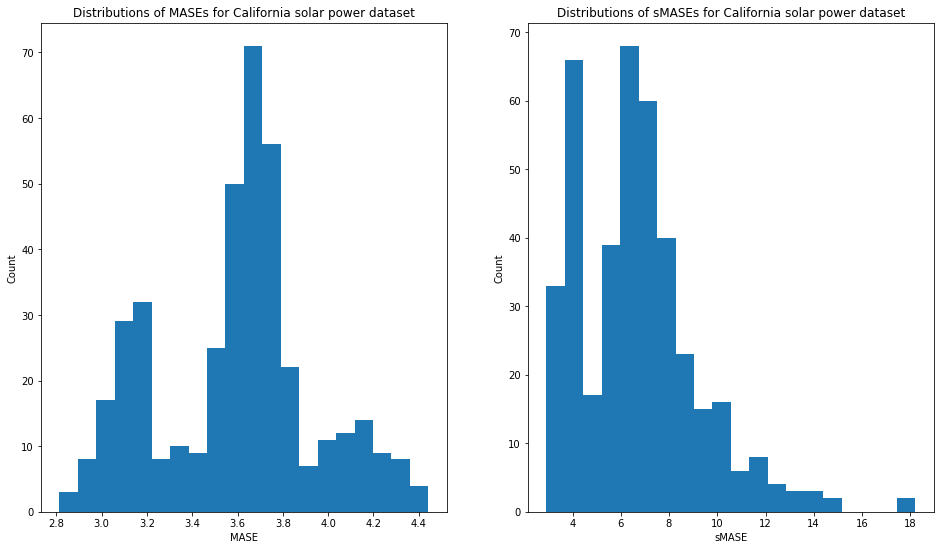

In [7]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(MASEs, bins=20)
ax[0].set_title('Distributions of MASEs for California solar power dataset')
ax[0].set_xlabel('MASE')
ax[0].set_ylabel('Count')
ax[1].hist(sMASEs, bins=20)
ax[1].set_title('Distributions of sMASEs for California solar power dataset')
ax[1].set_xlabel('sMASE')
ax[1].set_ylabel('Count');

In [8]:
MASE = np.mean(MASEs)
sMASE = np.mean(sMASEs)
print("Overall MASE: {:.4f}".format(MASE))
print("Overall sMASE: {:.4f}".format(sMASE))

Overall MASE: 3.5962
Overall sMASE: 6.6779


Show some example forecasts.

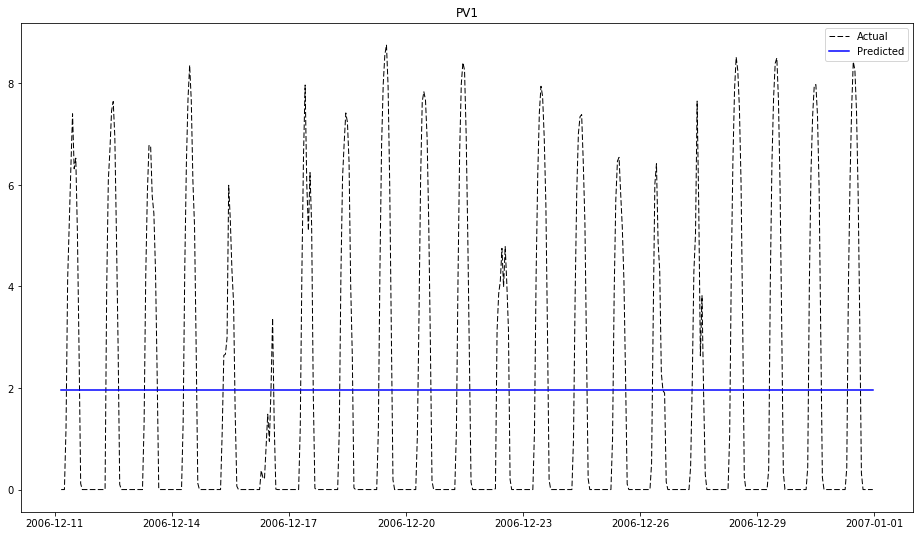

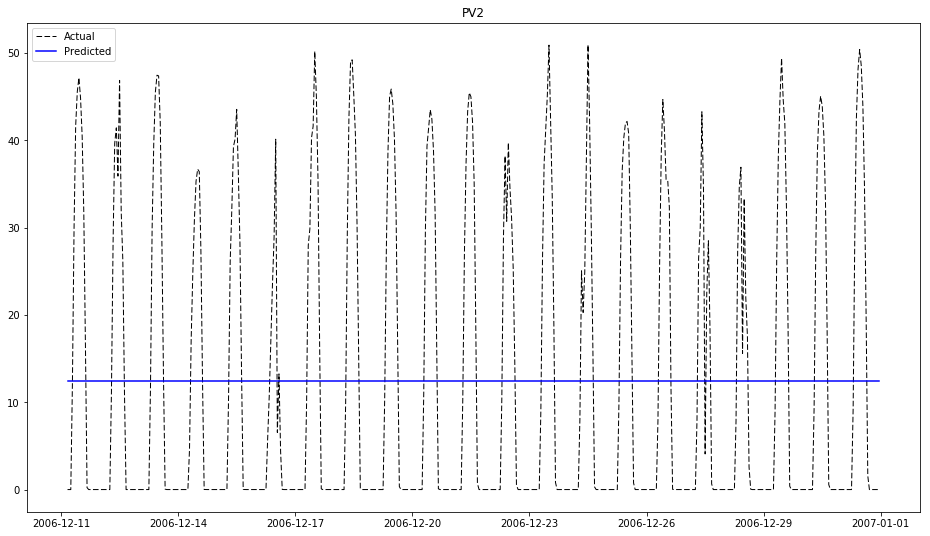

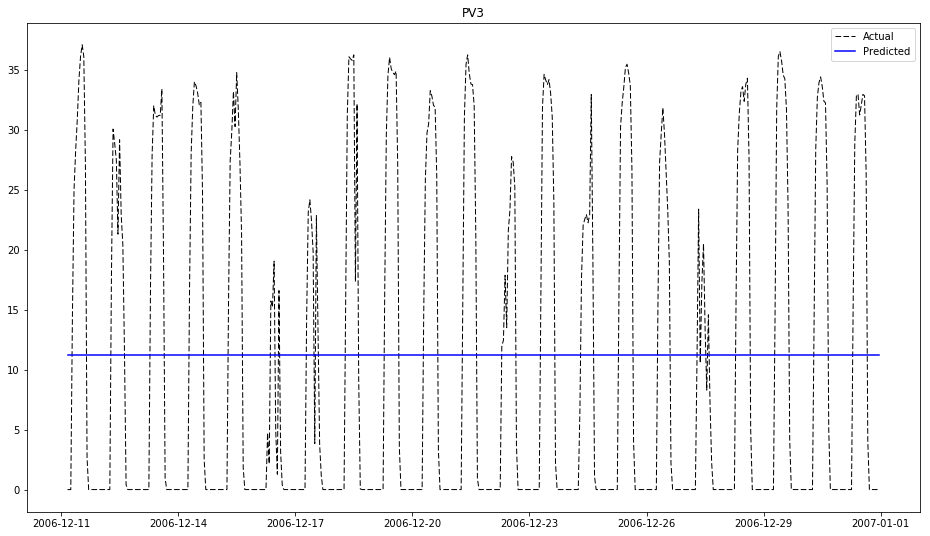

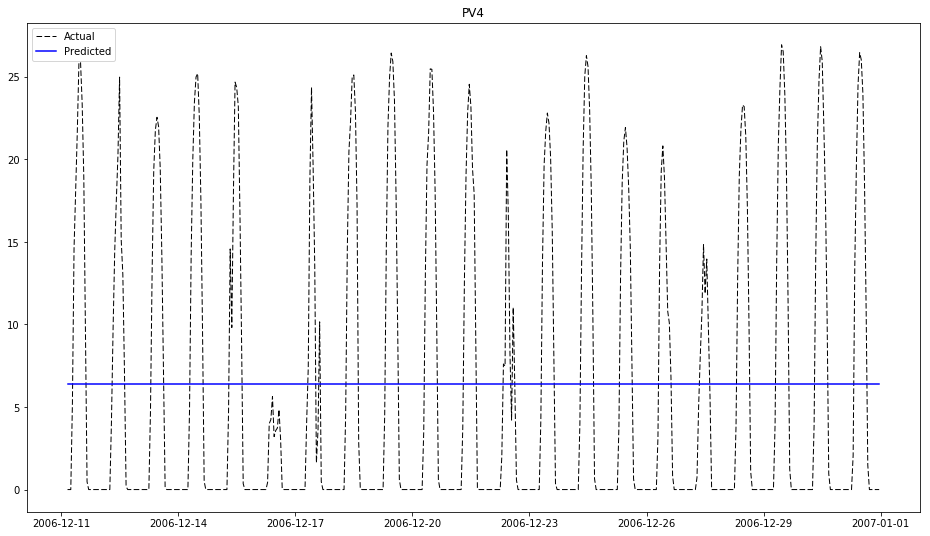

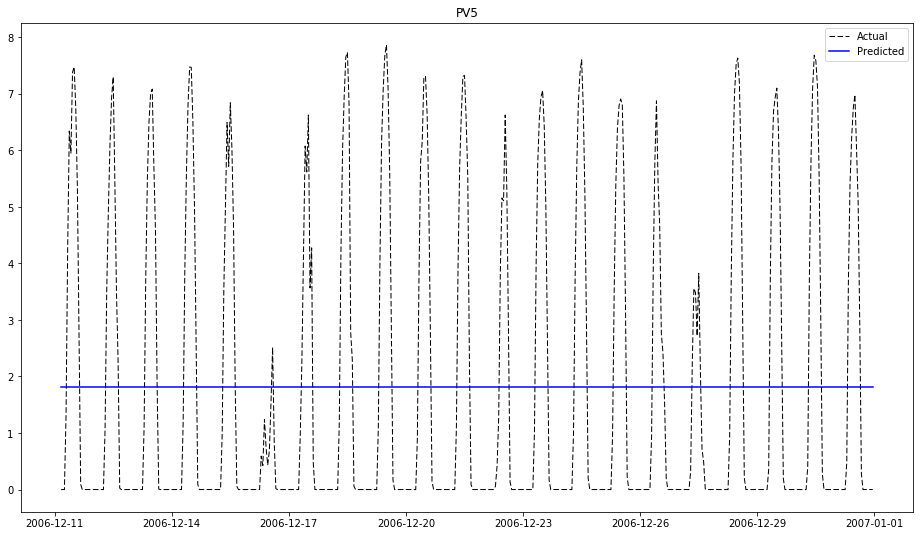

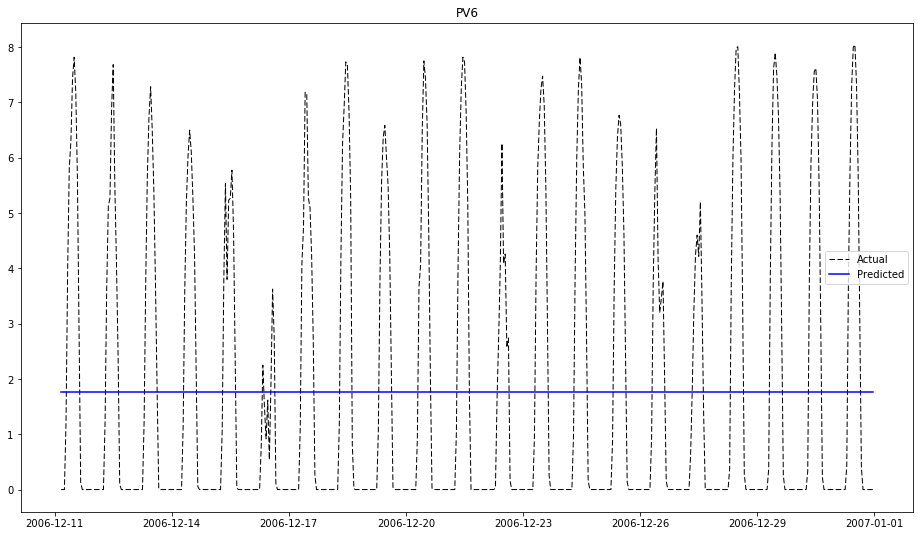

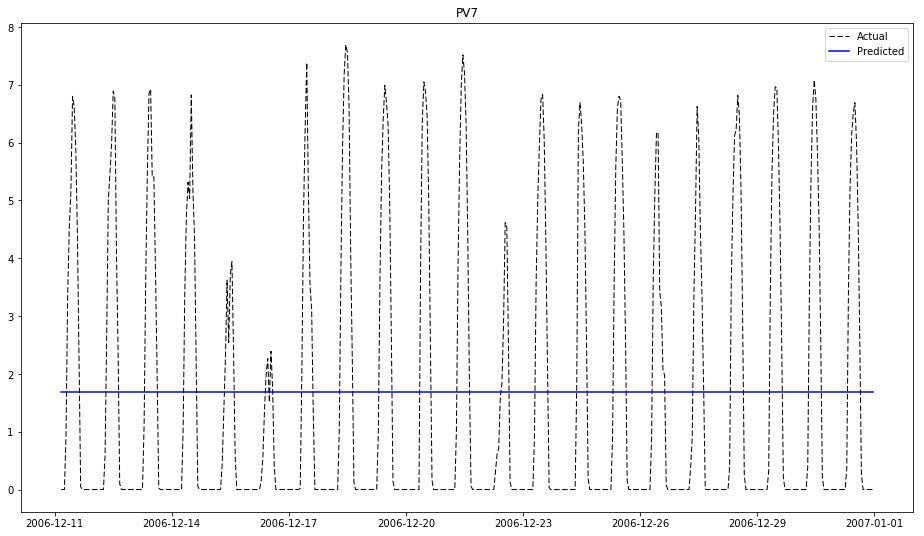

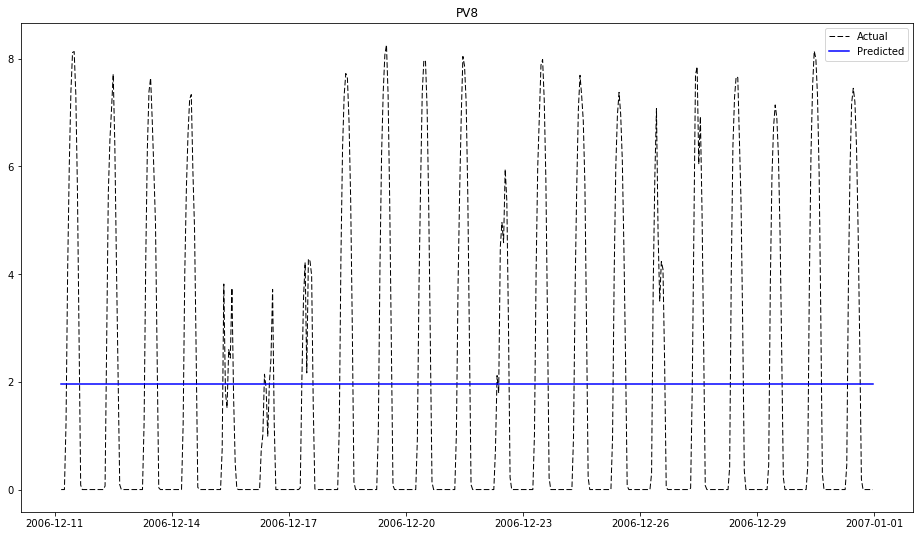

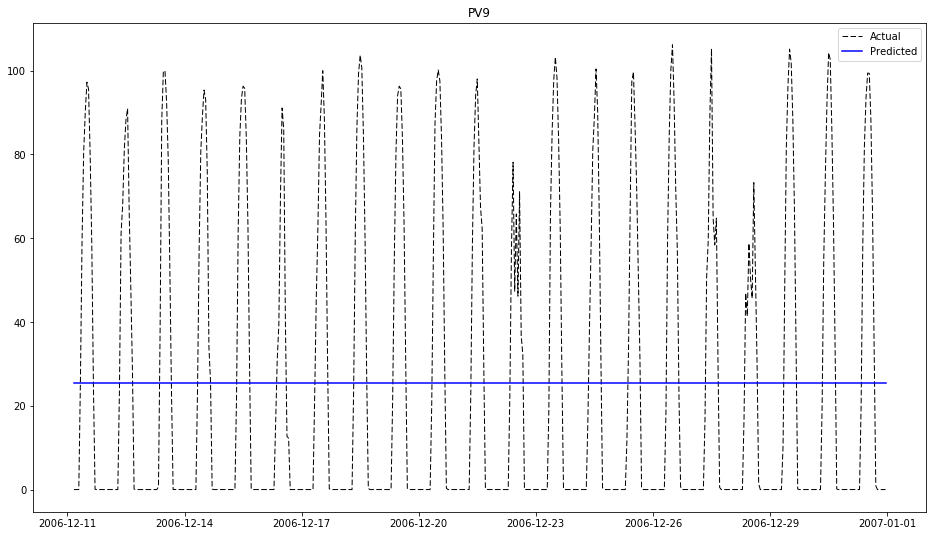

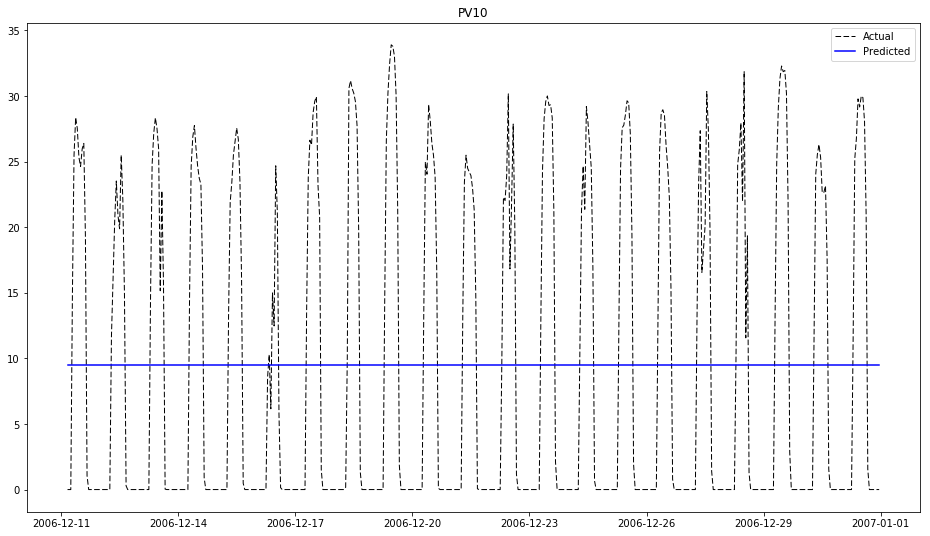

In [9]:
for solar in range(1, 11):
    plt.plot(results['DateTime'].iloc[-test_length:], results['pv%s' % solar].iloc[-test_length:],
             label='Actual', c='k', linestyle='--', linewidth=1)
    plt.plot(results['DateTime'].iloc[-test_length:], results['pv%s_pred' % solar].iloc[-test_length:],
             label='Predicted', c='b')
    plt.legend()
    plt.title('PV%s' % solar)
    plt.show()

Store the accuracy scores for the Average Approach models.

In [10]:
import pickle

with open('csp-MASE.pkl', 'wb') as f:
    pickle.dump(MASE, f)
    
with open('csp-sMASE.pkl', 'wb') as f:
    pickle.dump(sMASE, f)